In [ ]:
import pandas as pd

# Load the Titanic dataset
data= pd.read_csv("/content/Titanic-Dataset.csv")

# Show first 5 rows
print(data.head())

# Get summary of columns and data types
print(data.info())

# Check missing values in each column
print(data.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [ ]:
data.drop(columns=['Cabin'], inplace=True)

In [ ]:
data['Age'].fillna(data['Age'].median(), inplace=True)

/tmp/ipython-input-913469570.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [ ]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-4247733614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [ ]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [ ]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [ ]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Only scale 'Age' and 'Fare' columns
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [ ]:
print(data[['Age', 'Fare']].describe())

                Age          Fare
count  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18
std    1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01
25%   -5.657365e-01 -4.891482e-01
50%   -1.046374e-01 -3.573909e-01
75%    4.333115e-01 -2.424635e-02
max    3.891554e+00  9.667167e+00


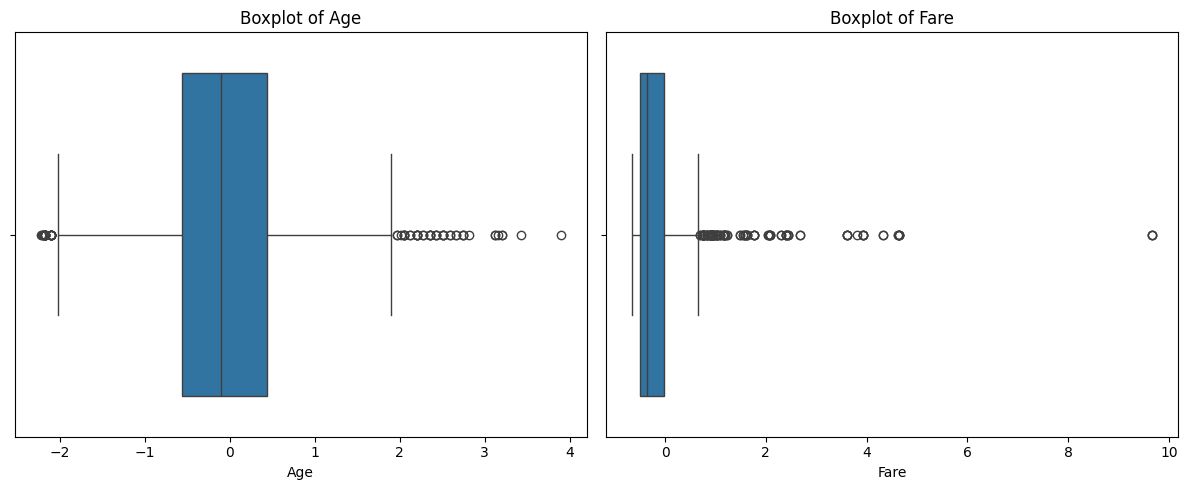

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Age'])
plt.title("Boxplot of Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Fare'])
plt.title("Boxplot of Fare")

plt.tight_layout()
plt.show()


In [ ]:
Q1_age = data['Age'].quantile(0.25)
Q3_age = data['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
data = data[(data['Age'] >= Q1_age - 1.5 * IQR_age) & (data['Age'] <= Q3_age + 1.5 * IQR_age)]

# For Fare
Q1_fare = data['Fare'].quantile(0.25)
Q3_fare = data['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
data = data[(data['Fare'] >= Q1_fare - 1.5 * IQR_fare) & (data['Fare'] <= Q3_fare + 1.5 * IQR_fare)]


In [ ]:
print(data.shape)

(718, 12)


In [ ]:
data.to_csv("titanic_cleaned.csv", index=False)